In [1]:
!pip install tensorflow
!pip install keras

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
Data = pd.read_csv('gas_turbines.csv')
Data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# **EDA and Visualization**

In [ ]:
Data.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [ ]:
Data.tail()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498

In [ ]:
Data.info() #15039 rows, 11 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
Data[Data.duplicated()] #no duplicate rows

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [ ]:
Data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [ ]:
Data.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

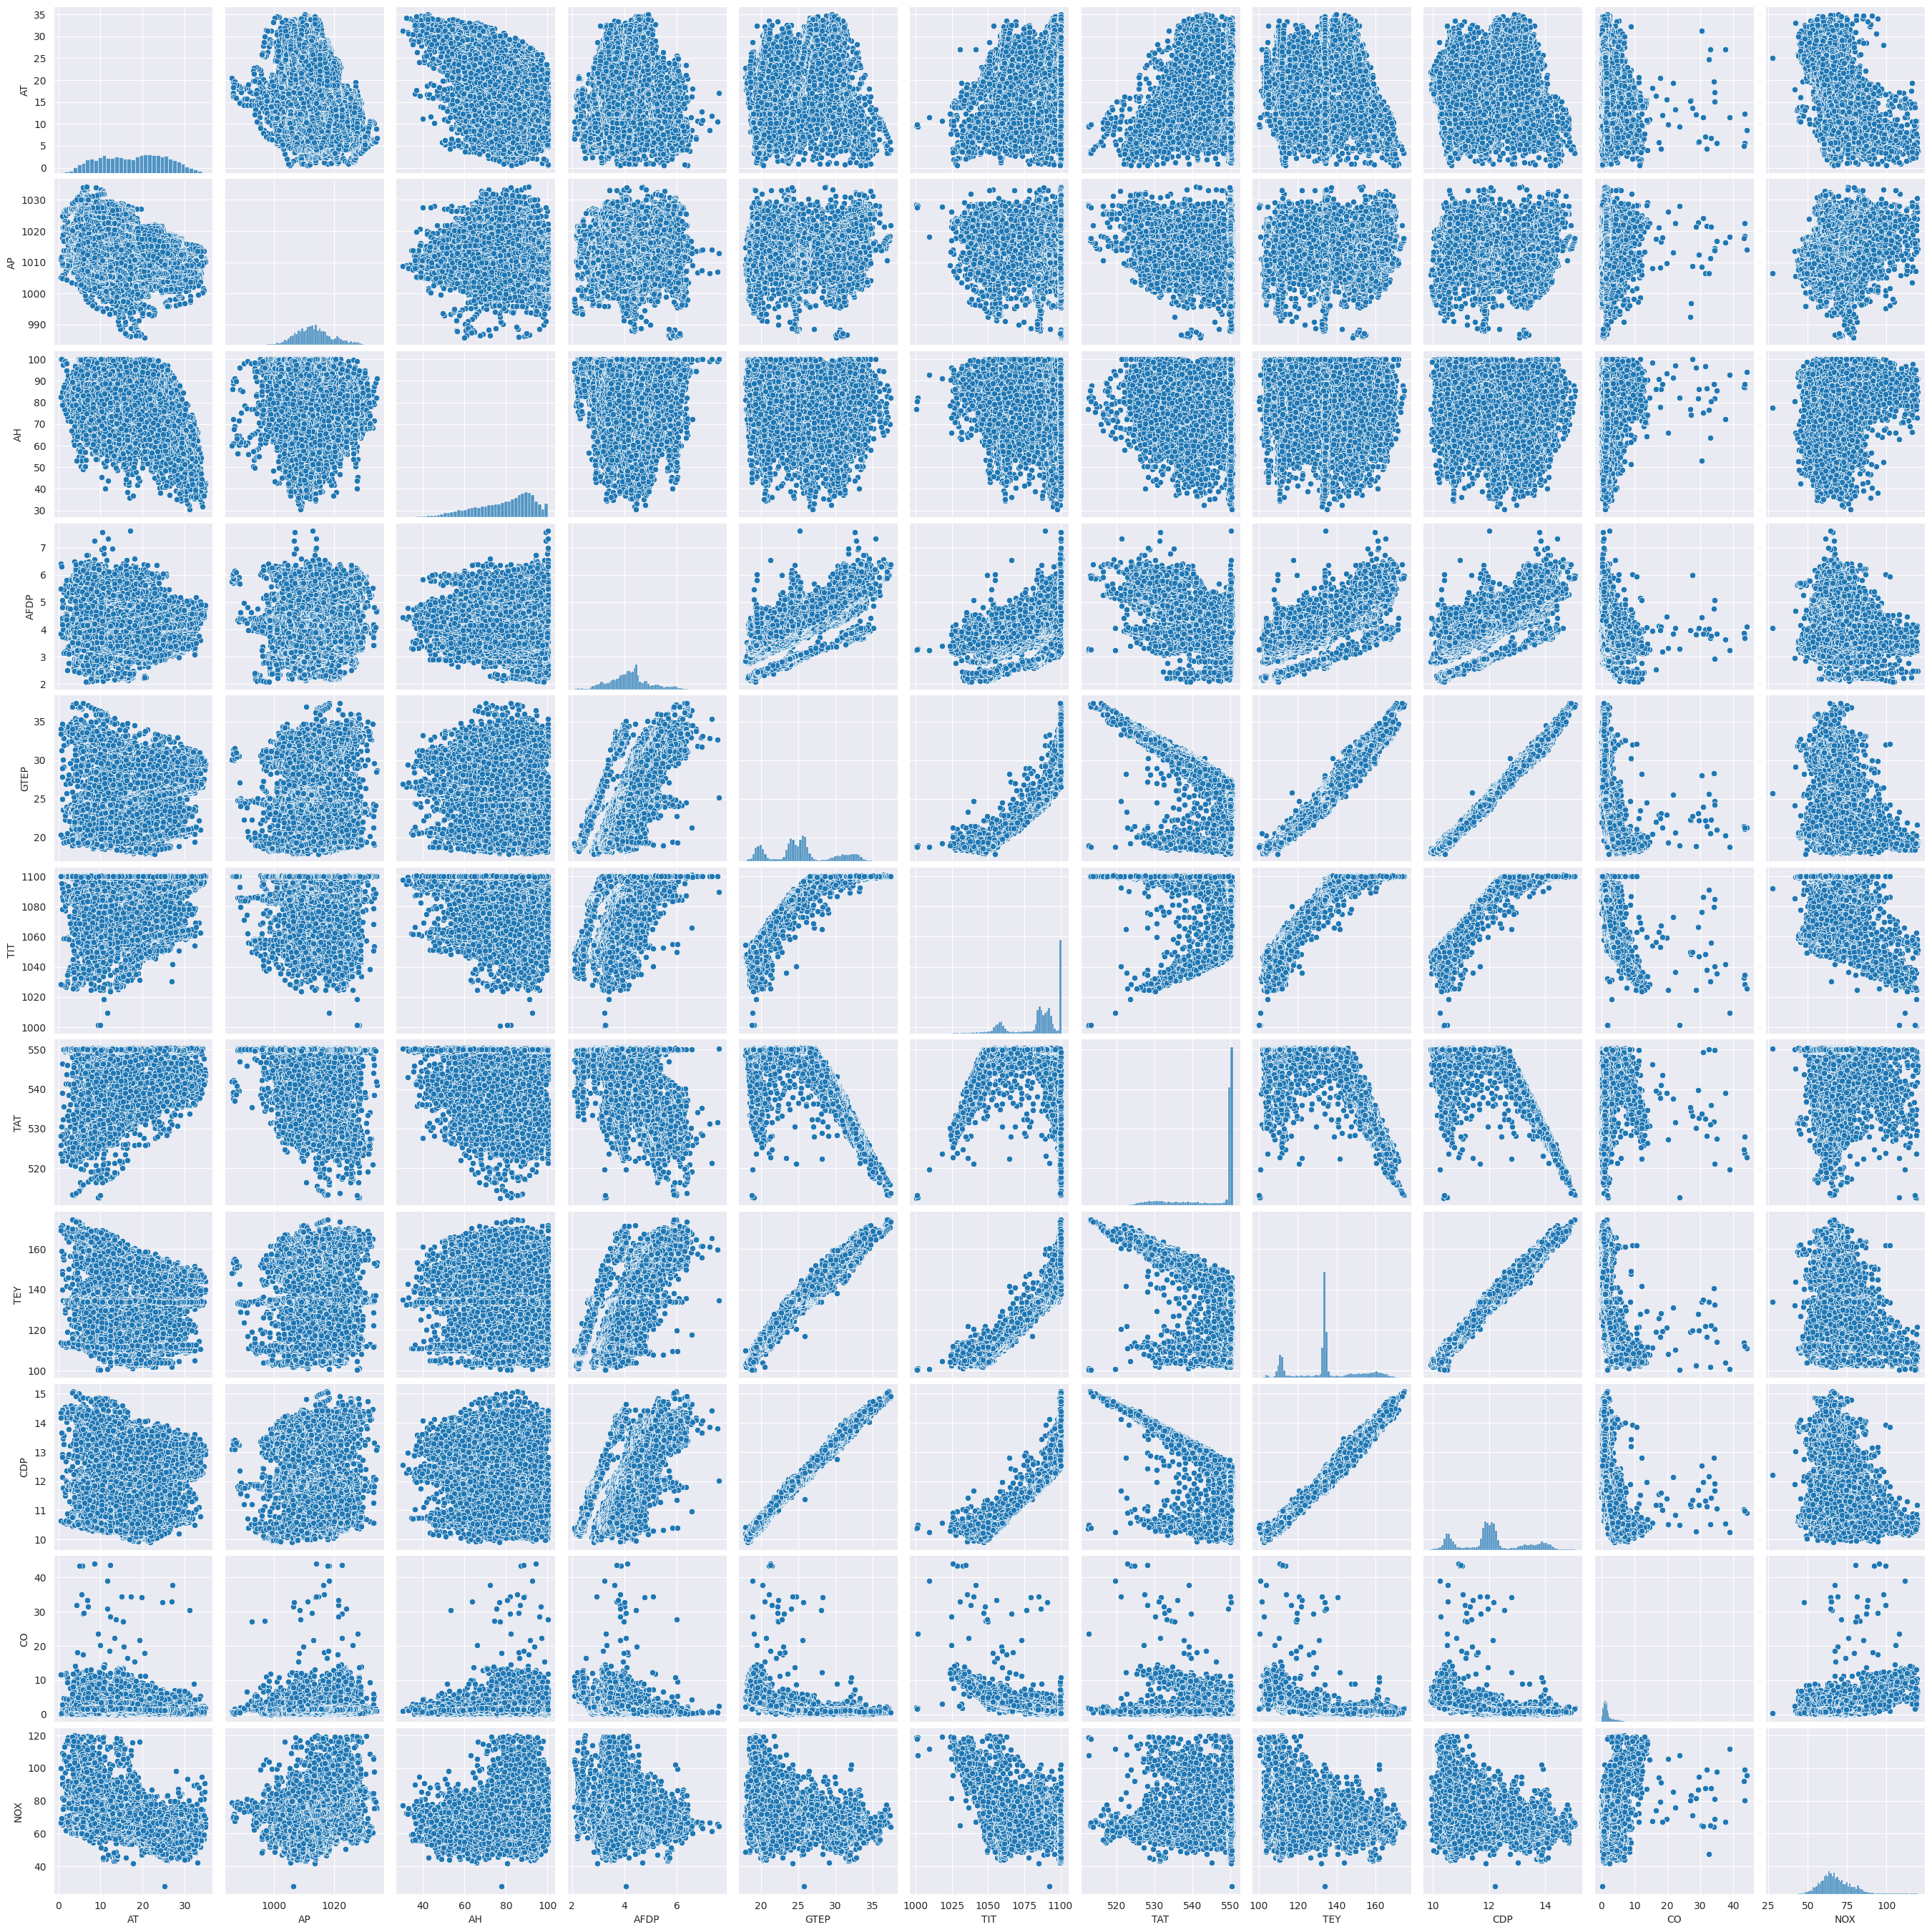

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(Data)

<Axes: >

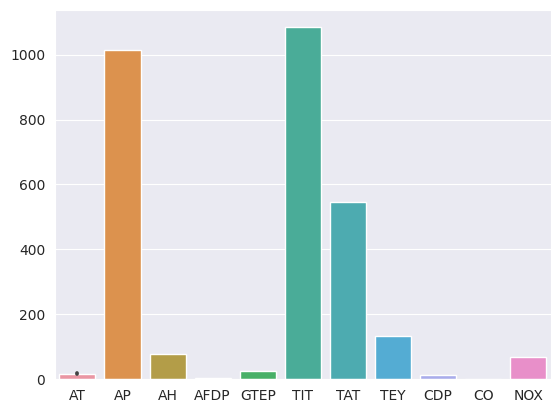

In [ ]:
sns.barplot(data=Data)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

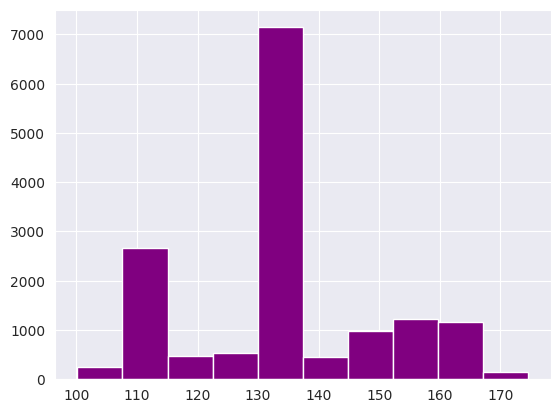

In [ ]:
plt.hist(Data['TEY'], color='purple')

In [ ]:
#here according to question the target variable is TEY i.e(Turbine Energy Yeild)

<Axes: >

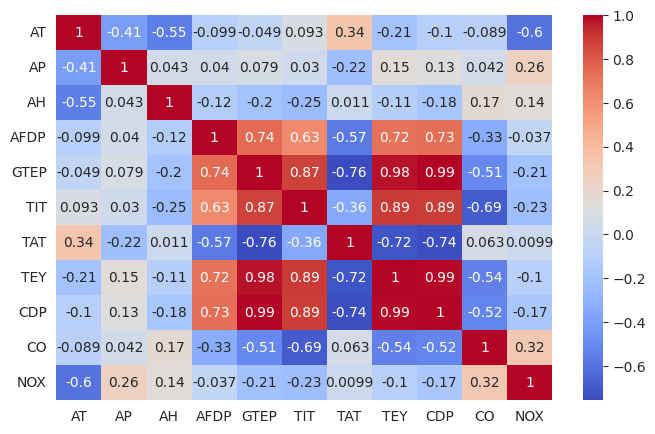

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(Data.corr(), annot=True, cmap="coolwarm")

# **Feature Selection by using Mutual Information Feature Selection**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [6]:
X=Data.drop(['TEY'],axis=1)
Y=Data['TEY']

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.403202
Feature 1: 0.146397
Feature 2: 0.091095
Feature 3: 0.657052
Feature 4: 1.589848
Feature 5: 1.304643
Feature 6: 0.910010
Feature 7: 1.711263
Feature 8: 0.507086
Feature 9: 0.303252


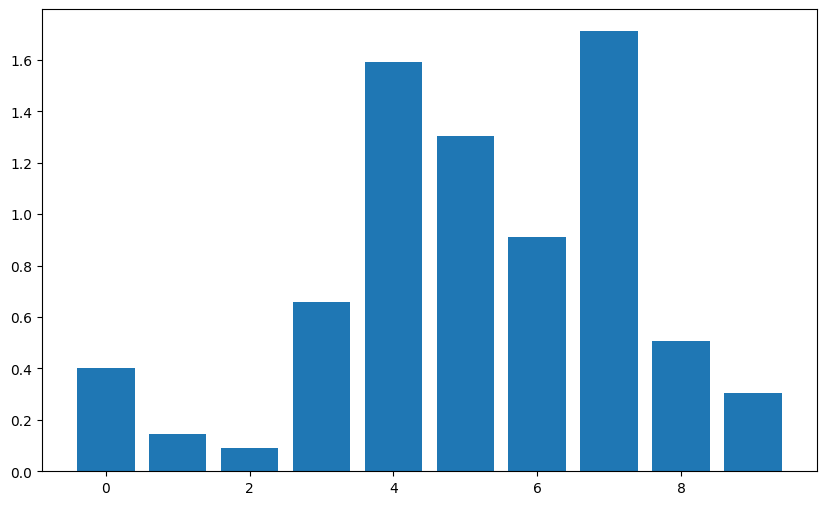

In [10]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [11]:
#Standardization
scaler=StandardScaler()
data=scaler.fit_transform(Data)
data1=pd.DataFrame(data, columns=Data.columns)

In [12]:
data1

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1     -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2     -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3     -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4     -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.153182 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453   
15035 -1.303986 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638   
15036 -1.386267 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650   
15037 -1.420423 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337   
15038 -1.430734 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689   

            TEY       CDP        CO       NOX  
0     -1.231172 -1.357331  0.532012  1.387845  
1     -1.229909 -1.363676  0.568733  1.393002  
2     -1.230541 -1.360957  0.552938  1.363586  
3     -1.229909 -1.356424  0.548933  1.382878  
4     -1.229909 -1.350985  0.574179  1.348591  
...         ...       ...       ...       ...  
15034 -1.426381 -1.543161  1.145792  1.085751  
15035 -1.415642 -1.513247  1.293578  1.119943  
15036 -1.516089 -1.467922  2.695925  2.170062  
15037 -1.481343 -1.422598  1.924683  2.391165  
15038 -1.428277 -1.377273  1.354150  2.321539  

[15039 rows x 11 columns]

In [13]:
X=data1.drop(['TEY','AT','AP','AH','CO','NOX'],axis=1)
Y=data1["TEY"]

In [14]:
X.head()

AFDP      GTEP       TIT       TAT       CDP
0 -0.921232 -1.379101 -1.488376  0.585240 -1.357331
1 -0.921495 -1.363528 -1.482325  0.585240 -1.363676
2 -0.944385 -1.351309 -1.476275  0.568715 -1.360957
3 -0.946884 -1.348194 -1.464173  0.583969 -1.356424
4 -0.924389 -1.354663 -1.458123  0.582698 -1.350985

In [15]:
Y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [16]:
# Splitting data into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [17]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


# **Artificial Neural Network Model - Backpropagation**

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [20]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [21]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 1s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0306 - mse: 0.0306
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0132 - mse: 0.0132
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0117 - mse: 0.0117
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0107
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0101
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0097 - mse: 0.0097
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0093
Epoch 10/100
264/264 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0090
Epoch 11/100
264/264 [=================

In [22]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

141/141 [==============================] - 0s 927us/step - loss: 0.0067 - mse: 0.0067
mse: 0.67%


# **Artificial Neural Network Model - Tuning of All Hyperparameters**

**As dataset contains too many records, it will take much time to get the results. So we will use only first 500 records and try to tune the hyperparameters to get the best results.**

In [23]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [24]:
X = Data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
Y = Data['TEY']

In [25]:
# Selecting first 500 records
X = X.iloc[0:500,:]
Y = Y.iloc[0:500]

In [26]:
# Scaling all the features
scaler.fit(X)
Y = StandardScaler().fit_transform(Y.values.reshape(len(Y),1))[:,0]

In [27]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

AFDP      GTEP       TIT       TAT       CDP
0   -1.759902 -1.532845 -2.140879  0.597669 -1.637742
1   -1.760236 -1.516668 -2.132865  0.597669 -1.644533
2   -1.789273 -1.503977 -2.124851  0.584370 -1.641623
3   -1.792443 -1.500741 -2.108824  0.596646 -1.636771
4   -1.763907 -1.507461 -2.100811  0.595623 -1.630950
..        ...       ...       ...       ...       ...
495  0.427695  0.194256 -0.706435 -0.594154 -0.072722
496 -1.244251 -1.463412 -3.919909 -0.777275 -1.760964
497 -1.300155 -1.463661 -3.984018 -0.855025 -1.660057
498 -1.030481 -1.114010 -3.463131 -0.919476 -1.255462
499  0.972718  1.029685  1.144718 -0.334306  0.891710

[500 rows x 5 columns]

In [28]:
# Splitting data into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [29]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (350, 5)
Shape of x_test:  (150, 5)
Shape of y_train:  (350,)
Shape of y_test:  (150,)


In [30]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear', 'linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5; 1/384] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/384] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.784 total time=   2.2s
[CV 2/5; 1/384] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/384] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.136 total time=   1.6s
[CV 3/5; 1/384] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/384] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, ne

[CV 3/5; 65/384] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.121 total time=   1.8s
[CV 4/5; 65/384] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


[CV 4/5; 65/384] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.929 total time=   1.3s
[CV 5/5; 65/384] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 65/384] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.036 total time=   1.4s
[CV 1/5; 66/384] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 66/384] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-0.781 total time=   1.3s
[CV 2/5; 66/384] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 66/384]

**So the best parameters are: {'activation_function': 'linear', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}**

# **Creating a new model as per best results of GridSearchCV**

In [31]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))

adam=Adam(learning_rate = 0.01)

In [32]:
# Compile Model
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

In [33]:
# Fit the model
final_model.fit(x_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
18/18 [==============================] - 1s 1ms/step - loss: 1.5045 - mse: 1.5045
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 1.0302 - mse: 1.0302
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.9181 - mse: 0.9181
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7734 - mse: 0.7734
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6024 - mse: 0.6024
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7923 - mse: 0.7923
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6146 - mse: 0.6146
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5262 - mse: 0.5262
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.2823 - mse: 0.2823
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3925 - mse: 0.3925
Epoch 11/100
18/18 [==============================] - 0s 2m

In [34]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

5/5 [==============================] - 0s 2ms/step - loss: 0.0729 - mse: 0.0729
mse
